## Description Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

   1)Come up with a customer profile (characteristics of a customer) of the different products 
   
   2)Perform univariate and multivariate analyses
   
   3)Generate a set of insights and recommendations that will help the company in targeting new customers.

 
## Data Dictionary

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

    1)Product - The model no. of the treadmill
    2)Age -  Age of the customer in no of years
    3)Gender - Gender of the customer
    4)Education - Education of the customer in no. of years
    5)Marital Status - Marital status of the customer
    6)Usage - Avg. # times the customer wants to use the treadmill every week
    7)Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    8)Income - Income of the customer
    9)Miles- Miles that a customer expects to run

 

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

## Read in the dataset

In [2]:
cardiofit = pd.read_csv("CardioGoodFitness.csv") #To read the csv file

## View the first few rows of the dataset

In [3]:
cardiofit.head() #To get the top 5 data printed

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

In [4]:
cardiofit.shape

(180, 9)

Observations: We have 180 observations of 9 columns


### Check the shape of the dataset

In [5]:
cardiofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Check the datatype of the variables to make sure that the data is read in properly

In [6]:
cardiofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
cardiofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observations:

    1)Product, Gender, MaritalStatus are of object data type.
   
    2)All the other variables are numerical integer and there for their python data types (int64) are ok.
    
    3)There are no null values. It clearly states that there is no missing data in the dataset. The dataset is clean enough to start the analytical work.


In [8]:
goodfit=cardiofit.copy() # creating a copy of the provided dataset is a good practice

### Let us analyse the quantitative variables in the dataset

In [9]:
cardiofit.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.79000,15.57000,3.46000,3.31000,53719.58000,103.19000
std,6.94000,1.62000,1.08000,0.96000,16506.68000,51.86000
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


### Observations:

   1)This clearly shows the statistics(Mean,Median,Quartiles) of the provided structured data.
   
   
   2)There is a huge difference between the Quartile 3 : Q3(75%) and the maximum value for the Income and Miles Columns. This clearly indicates the existance of outliers in those data.
   
   
   3)The median value is not affected by the outliers but the mean value is affected by the outliers.

In [10]:
data= goodfit.groupby(['Age'])['Income'].mean().sort_values(ascending = False).reset_index().head()
data

,Age,Income
0,42,89641.00000
1,47,80715.50000
2,48,76747.50000
3,45,72731.00000
4,30,71374.28571


In [11]:
data2= goodfit.groupby(['Fitness'])['Income'].mean().sort_values(ascending = False).reset_index().head()
data2

,Fitness,Income
0,5,74396.70968
1,4,54995.29167
2,1,51939.00000
3,3,48853.49485
4,2,46179.69231


In [12]:
data3= goodfit.groupby(['Income'])['Miles'].mean().sort_values(ascending = False).reset_index().head()
data3

,Income,Miles
0,85906,300.00000
1,75946,240.00000
2,92131,230.00000
3,89641,230.00000
4,52291,200.00000


In [13]:
data4= goodfit.groupby(['Age'])['Miles'].mean().sort_values(ascending = False).reset_index().head()
data4

,Age,Miles
0,42,200.00000
1,30,142.28571
2,39,132.00000
3,29,132.00000
4,48,122.00000


In [14]:
### To take some subsets of the given data [data, data2, data3,data4]that will be used later

# Univariate Analysis

Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.

Let us go for the univariate analysis.

## Now let us check the distribution of the data.

## What does the distribution of data tell us?

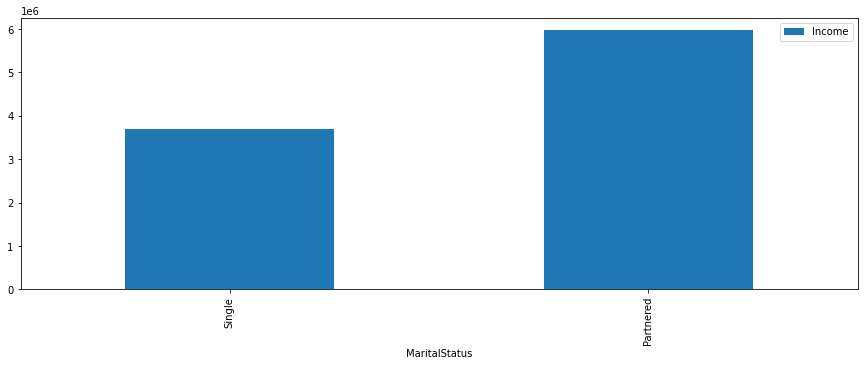

In [15]:
cardiofit.groupby(by=['MaritalStatus'])['Income'].sum().reset_index().sort_values(['Income']).tail(10).plot(x='MaritalStatus',
                                                                                                           y='Income',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

### Observation:

    The partnered/ married persons total income is higher than the total income of the single persons.

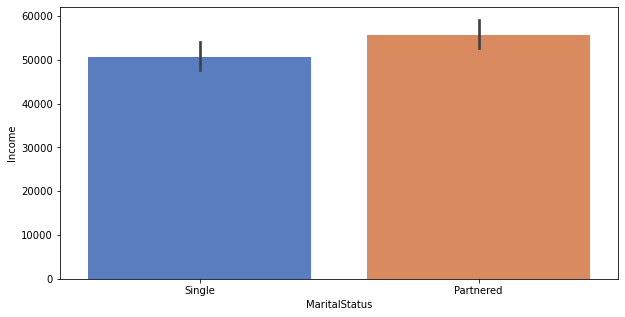

In [16]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='MaritalStatus', y='Income', data=goodfit, palette='muted')  # barplot

### Observations:

    The income of the partnered persons are greater than that of the single persons.

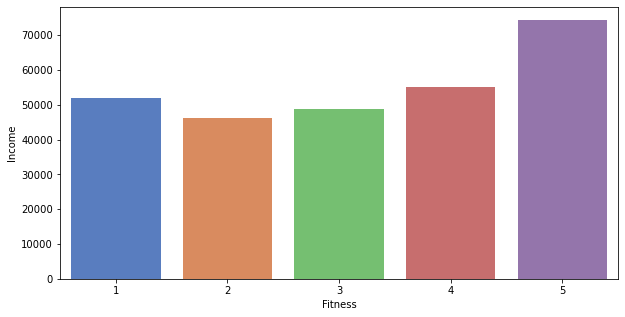

In [17]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Fitness', y='Income', data=data2, palette='muted')  # barplot

### Observations:

    1)The Highest income customers tend to provide the highest self rated fitness score (5).
    
    2) With decreasing income, the customers are also showing a decrease in fitness score.       3) But The lowest rating (1) is provided primarily by the customers whose income is around 50000.  

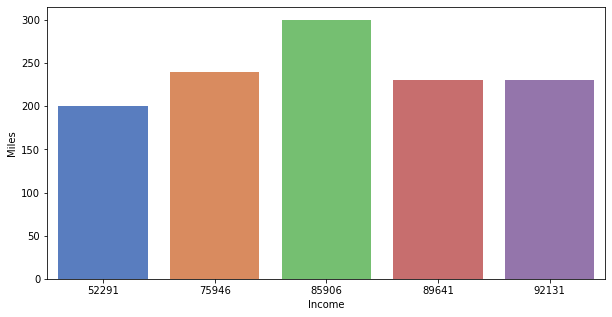

In [18]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Income', y='Miles', data=data3, palette='muted')  # barplot

### Observations:

    1) The middle income range customers run the highest miles in the treadmill.
    
    2)The lowest income range customers run the lowest miles miles in the treadmill.
    


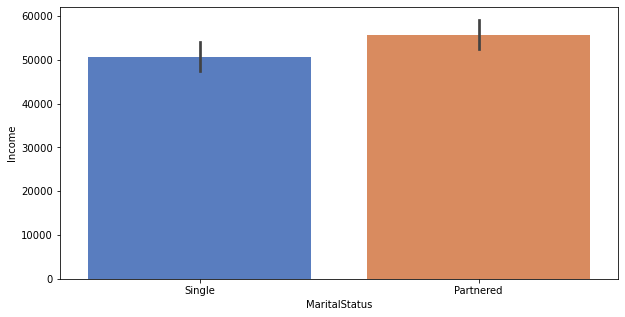

In [19]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='MaritalStatus', y='Income', data=cardiofit, palette='muted')  # barplot

### Observations:

    The plot shows the greater income of the partnered customers compared to the single customers with the display of the confidence interval.

## Violin Plot

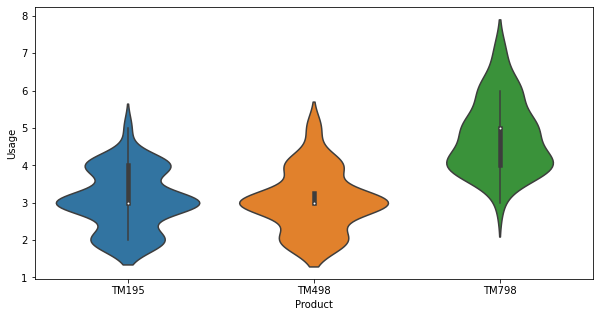

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(x=goodfit.Product, y=goodfit['Usage'])
plt.show()

### Observations:

    1)  The plot is similar to a box plot but here, we get a density function
    
    2)  Distribution of usage across every product is highly skewed
    
    3)  Potential of lot of outliers



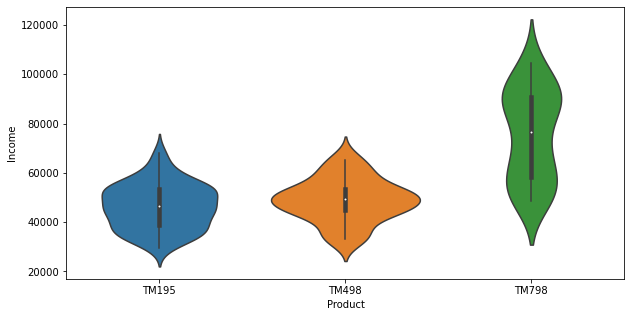

In [21]:
plt.figure(figsize=(10,5))
sns.violinplot(x=goodfit.Product, y=goodfit['Income'])
plt.show()

### Observations:

    1)  The plot is similar to a box plot but here, we get a density function
    
    2)  Distribution of income across every product is highly skewed
    
    3)  Potential of lot of outliers

## Box Plot

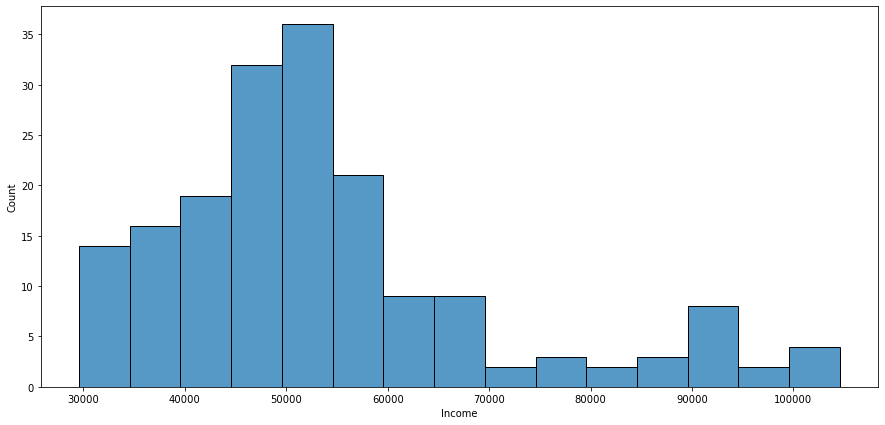

In [22]:
plt.figure(figsize=(15, 7))
sns.histplot(goodfit.Income)
plt.show()

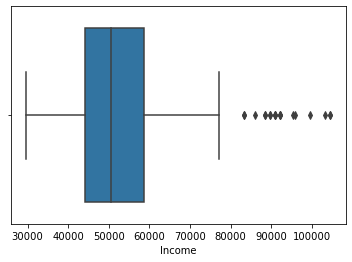

In [23]:
sns.boxplot(data = goodfit, x = 'Income')
plt.show()

Observations:

    1) Income has a right skewed distribution with a lot of outliers towards the higher end.
    
    
    2) The median income of customers is 50000



# Multivariate analysis

Multivariate analysis is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2
ex: Pairplot, 3D scatter plot

## Point Plot

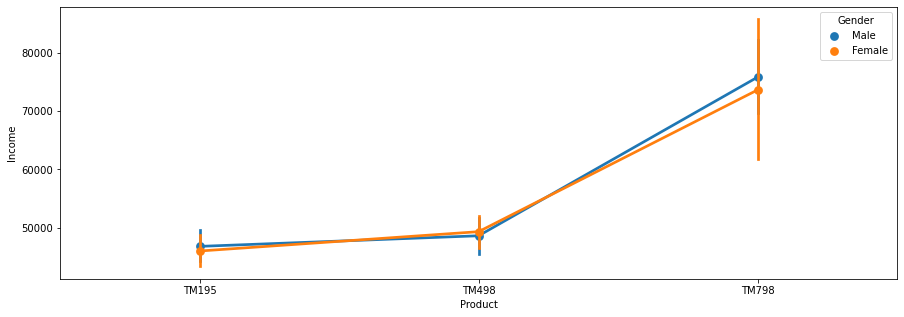

In [24]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Product", y="Income", hue = 'Gender',  data=cardiofit)
plt.show()

### Observations:

    1) TM 195 Products are prefered by the lower income customers. Both Male and Female perfered it almost equally.
    
    2) TM 498 Poducts are prefered by slightly higher income customers than those who bought TM 195. 
    
    3)TM 798 Products are prefered by the highest income customers. Male customers perfered it slightly higher than female customers.
    
    4) The graph is plotted with a confidence interval showing the indication of variation.


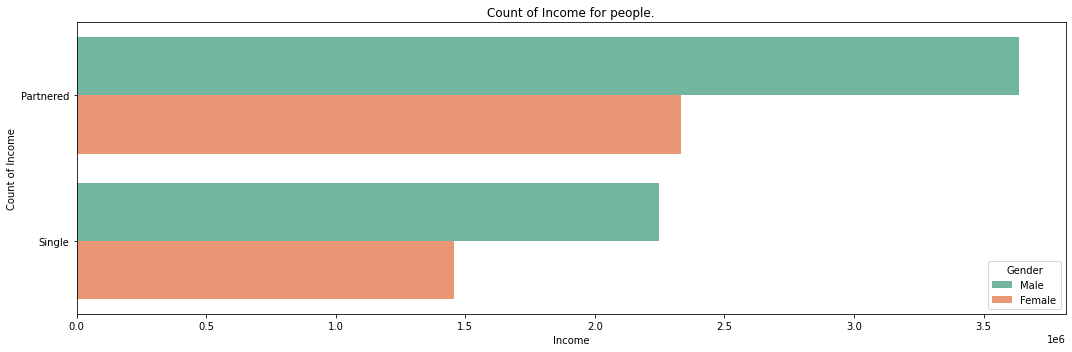

In [25]:
cardiofit_sum_m = cardiofit['Income'].groupby([cardiofit['MaritalStatus'],cardiofit['Gender']]).sum()  # number of suicides by country and sex
cardiofit_sum_m = cardiofit_sum_m.reset_index().sort_values(by='Income',ascending=False) # sort in descending order
most_cont_m = cardiofit_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of Income for people.')

sns.barplot(y='MaritalStatus',x='Income',hue='Gender',data=most_cont_m,palette='Set2');

plt.ylabel('Count of Income')
plt.tight_layout()

### Observations:

    Male customer's income is higher than that of female customer's in both the cases of partnered and single customers.

# Pair Plot¶

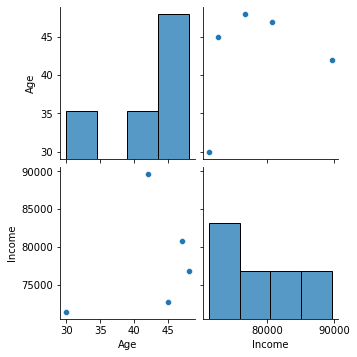

In [26]:
sns.pairplot(data)


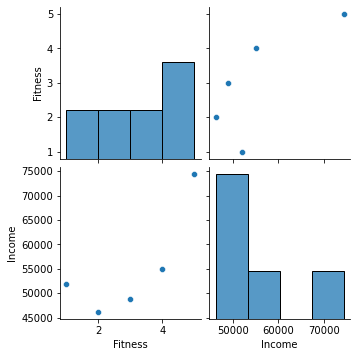

In [27]:
sns.pairplot(data2)

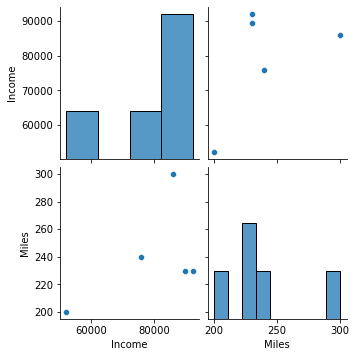

In [28]:
sns.pairplot(data3)

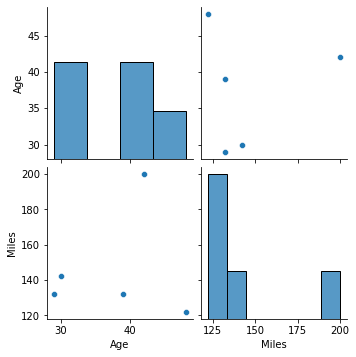

In [29]:
sns.pairplot(data4)

### Observations:

    The above plot shows subsets of the pairplot that is shown below. The plots show the correlation between any two columns.

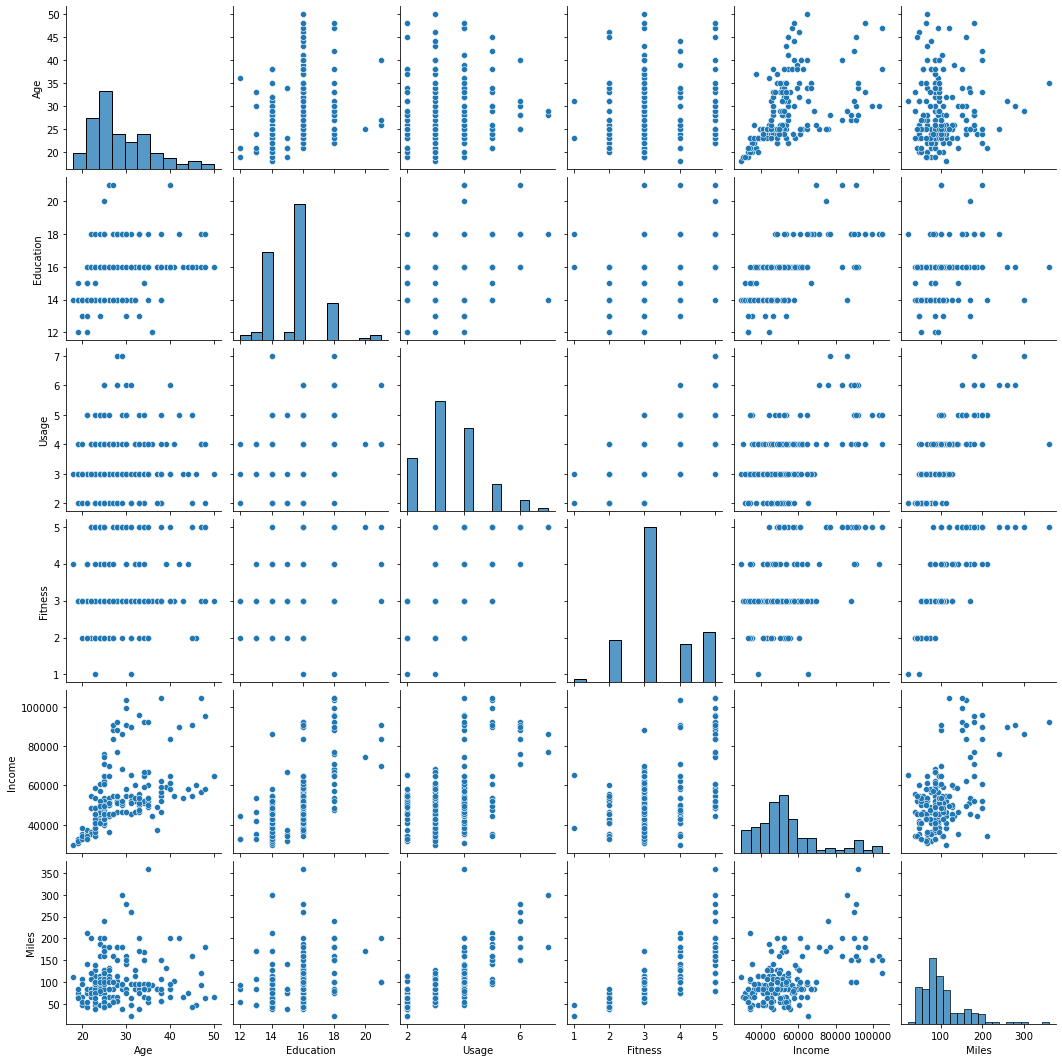

In [30]:
sns.pairplot(goodfit)

#### Observations:

    In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data. For getting any insights between any two columns in the dataset, we can vidualize the relationship by using this plot.

/home/alikaiser12/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income'>

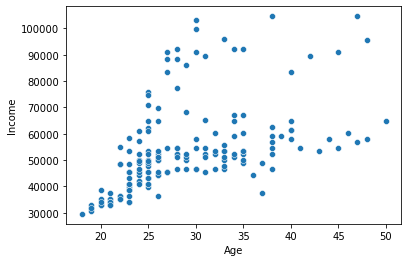

In [31]:
sns.scatterplot(cardiofit['Age'], cardiofit['Income']) 

#### Observations:

     As the age increases, the income of the customers also increases. The distribution            density is higher in the lower Age, lower Income customers. 
     It means that the Old age, Higher income customers are low in proportion in the given        dataset.
       
       

In [32]:
goodfit.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


### Observations:


    1)Usage (fitness score rating) gets prominent when the customers run the treadmill in miles. Miles is highly correlated with Usage.
    
    2)Fitness is also highly correlated with Miles as well.
    
    3)The low correlated pairs are (Fitness, Age),(Usage, Age),(Miles, Age),(Age,Usage),(Age, Fitness),(Age, Miles).
    
    4)There is no negative correlation between any two columns of the data.




<AxesSubplot:>

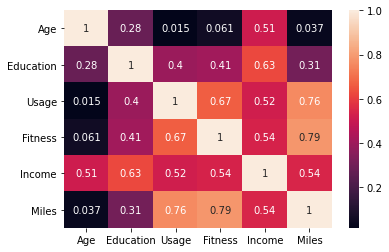

In [33]:
sns.heatmap(cardiofit.corr(), annot=True)  # plot the correlation coefficients as a heatmap


### Observations:

    1)Instead of doing a simple goodfit.corr(), we can use the heatmap when there are large number of variables
    
    2)The color helps with picking out the most correlated easily
    
    3)In the above case, This heatmap reduces the complexity of going through complex correlational decimal data by using color background
    
    4)The darker the color higher the correlation
    
    5)Some obvious correlations are that customers running high Miles in treadmill will rate high Fitness scores
    
    
    6)There is no negative correlation, so the color background rating ranges from 0 to 1.0.



### Conclusion:

    We can conclude that the partnered/ married persons total income is higher than the total income of the single persons.

    Moreover,The Highest income customers tend to provide the highest self rated fitness score (5).It clearly states the satisfaction of the elite class customers regarding the performance of the product.
    
    As the age increases, the income of the customers also increases. The distribution        density is higher in the lower Age, lower Income customers. 
    It means that the Old age, Higher income customers are low in proportion in the given    dataset.

    Moreover, male customer's income is higher than that of female customer's in both the cases of partnered and single customers.
    
    In addition to these,TM 798 Products are prefered by the highest income customers. Male customers perfered it slightly higher than female customers.
    
    Income seems to be an essential indicator of the buyers persona from this data. The median income of customers is 50000. It helps in customer segmentation based on income.

   
    